# Software Defects Detection

In [60]:
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

Reading and reviewing the data

In [61]:
df = pd.read_csv('miniprj1.csv')
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [62]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [63]:
 df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,1938.056124,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,7453.591519,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,33.672500,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,204.310000,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,924.075000,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,119649.480000,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_Op            498 non

# Data Preprocessing

1.Typecasting-The conversion of one data type into the other data type.

In [65]:
df['defects']=df['defects'].astype('int')
df['lOCode']=df['lOCode'].astype('float')
df['lOComment']=df['lOComment'].astype('float')
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1.0,0.0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0.0,0.0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0.0,0.0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    float64
 13  lOComment          498 non-null    float64
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_Op            498 non

2.Normalization-rescaling real-valued numeric attributes into a 0 to 1 range to make model training less sensitive to the scale of features.

In [67]:
df_max_scaled = df.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
df=df_max_scaled
df=pd.DataFrame(df)

In [68]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.002600,0.014583,0.046667,0.022222,0.000627,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.0250,0.00590,0.012195,1.0,0.016667,0.003822,0.000952,0.001474,0.008642,0.0
1,0.002364,0.010417,0.033333,0.015873,0.000482,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.0125,0.00295,0.006098,0.5,0.013889,0.003185,0.000793,0.001229,0.006173,1.0
2,0.056738,0.052083,0.033333,0.047619,0.030361,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.0125,0.00000,0.036585,0.0,0.208333,0.047771,0.034893,0.023342,0.055556,0.0
3,0.047281,0.041667,0.133333,0.031746,0.022651,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.0000,0.00000,0.018293,0.0,0.222222,0.025478,0.024584,0.019656,0.043210,0.0
4,0.056738,0.062500,0.200000,0.031746,0.034699,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.00000,0.018293,0.0,0.222222,0.038217,0.036479,0.031941,0.067901,0.0


# Feature Selection using Correlation plot(pearsons correlation)

Splitting the data

In [69]:
y = df['defects']
X = df.drop(['defects'], axis = 1)

Each cell represents the correlation between two variables and it is used to summarize data for advanced analyses 
and as an input into a more advanced analysis


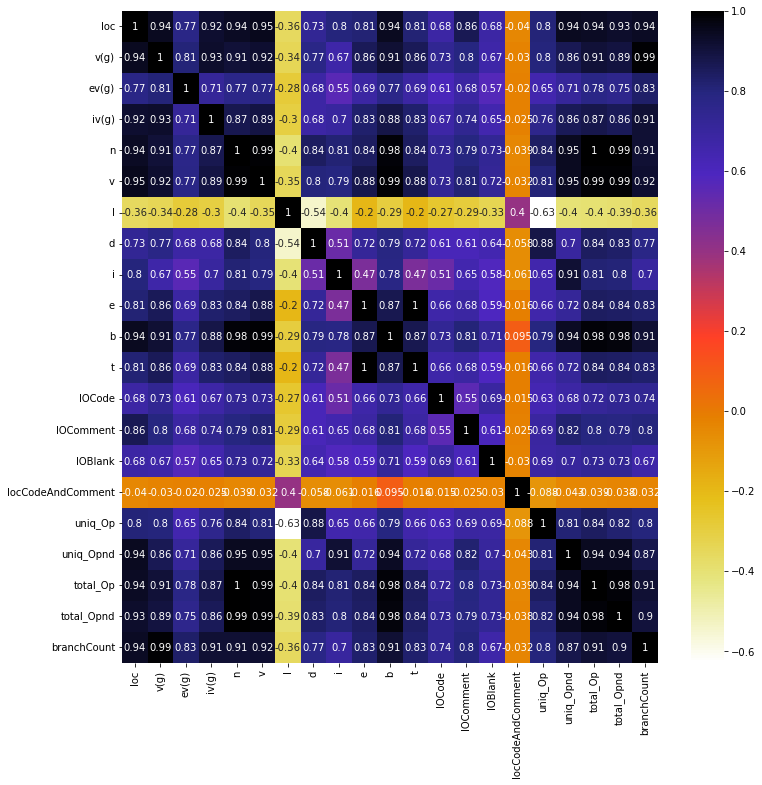

In [70]:
cor = X.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [71]:
print(df)

          loc      v(g)     ev(g)     iv(g)         n         v         l  \
0    0.002600  0.014583  0.046667  0.022222  0.000627  0.000076  1.000000   
1    0.002364  0.010417  0.033333  0.015873  0.000482  0.000058  0.769231   
2    0.056738  0.052083  0.033333  0.047619  0.030361  0.018052  0.084615   
3    0.047281  0.041667  0.133333  0.031746  0.022651  0.012584  0.046154   
4    0.056738  0.062500  0.200000  0.031746  0.034699  0.020213  0.046154   
..        ...       ...       ...       ...       ...       ...       ...   
493  0.111111  0.031250  0.033333  0.047619  0.123373  0.091319  0.030769   
494  0.056738  0.041667  0.100000  0.047619  0.051566  0.034316  0.038462   
495  0.193853  0.114583  0.100000  0.158730  0.228916  0.184290  0.015385   
496  0.023641  0.020833  0.033333  0.015873  0.015422  0.008783  0.115385   
497  0.066194  0.062500  0.166667  0.079365  0.050120  0.032955  0.046154   

            d         i             e  ...  lOCode  lOComment   lOBlank  \


# Visualization

From the below visualisation, we will get an idea about how the features are distributed with respect to the target feature 

In [72]:
import plotly.express as plty

In [73]:
fig = plty.histogram(df, x="loc", y="defects", color="loc",title="Line count of code VS Defects")
fig.show()

Here we can see that how line count of code distributed with respect to Defects

In [74]:
fig = plty.histogram(df, x="defects", y="b", color="defects",title="Bug VS Defects")
fig.show()

Here the distribution of Bug with respect to Defects

In [75]:
fig = plty.histogram(df, y="defects", x="total_Opnd", color="total_Opnd",title="Total operands VS Defects")
fig.show()

Here we can see that how total operands distributed with respect to Defects

In [76]:
fig = plty.histogram(df, x="defects", y="v(g)", color="defects",title="Cyclomatic Complexity VS Defects")
fig.show()

Here we can see that how cyclomatic complexity distributed with respect to Defects

In [77]:
fig = plty.histogram(df, x="defects", y="uniq_Opnd", color="defects",title="Unique operands VS Defects")
fig.show()

Here we can see that how unique operands distributed with respect to Defects

Dropping Features with low importance and with high correlation

In [78]:
X = df.drop(['loc','ev(g)','l','b','locCodeAndComment','defects','v(g)','iv(g)','e','t','lOBlank'], axis = 1)

Visualization of our target variable 'defects'. It shows us how imbalanced our data is. 
Almost 90.16% are false values and 9.83% are true values.So our data is highly imbalanced.

<AxesSubplot:xlabel='defects', ylabel='count'>

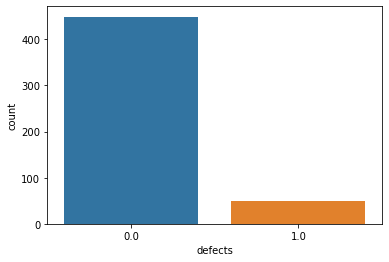

In [79]:
sns.countplot(x='defects',data=df)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

# Data Balancing Using Undersampling And Oversampling Methods

1.Under-sampling using Edited Nearest Neighbours
his method will clean the database by removing samples close to the decision boundary.



In [81]:
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
enn = EditedNearestNeighbours()
X_res2, y_res2 = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res2))

Resampled dataset shape Counter({0.0: 255, 1.0: 30})


2.Over-sampling using Random Over Sampler
Random oversampling involves randomly selecting examples 
from the minority class, with replacement, and adding them to the training dataset.

In [82]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=100)
X_res3, y_res3 = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res3))

Resampled dataset shape Counter({0.0: 318, 1.0: 318})


3.Over-Sampling using Synthetic data generation
It allows us to generate synthetic samples for our minority categories.


In [83]:
from imblearn.over_sampling import SMOTE #synthetic data generation
sm = SMOTE(random_state=100)
X_res5, y_res5 = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res5))

Resampled dataset shape Counter({0.0: 318, 1.0: 318})


# Using Lazy Predict to find the best model

In [84]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

Listing out the best models using the data Under-Sampled with Edited Nearest Neighbours



In [85]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_res2, X_test, y_res2, y_test)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:01<00:00, 16.89it/s]

[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.27it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.89               0.73     0.73      0.89   
SGDClassifier                      0.87               0.70     0.70      0.87   
LabelSpreading                     0.87               0.70     0.70      0.87   
LabelPropagation                   0.87               0.70     0.70      0.87   
NearestCentroid                    0.82               0.69     0.69      0.83   
BernoulliNB                        0.73               0.69     0.69      0.77   
PassiveAggressiveClassifier        0.87               0.66     0.66      0.86   
BaggingClassifier                  0.87               0.66     0.66      0.86   
GaussianNB                         0.83               0.65     0.65      0.83   
LogisticRegression                 0.89               0.64     0.64      0.87   
LGBMClassifier              

Listing out the best models using the data Over-Sampled with Random Over Sampler



In [86]:
clf = LazyClassifier()
models,predictions = clf.fit(X_res3, X_test, y_res3, y_test)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:02<00:00, 13.10it/s]

[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.08it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.83               0.81     0.81      0.85   
CalibratedClassifierCV             0.83               0.81     0.81      0.85   
LogisticRegression                 0.83               0.81     0.81      0.85   
LinearDiscriminantAnalysis         0.79               0.81     0.81      0.82   
RidgeClassifierCV                  0.79               0.79     0.79      0.82   
RidgeClassifier                    0.79               0.79     0.79      0.82   
SVC                                0.81               0.76     0.76      0.83   
PassiveAggressiveClassifier        0.77               0.74     0.74      0.80   
NuSVC                              0.79               0.70     0.70      0.81   
NearestCentroid                    0.82               0.67     0.67      0.83   
BernoulliNB                 

Listing out the best models using the data Over-Sampled with SMOTE



In [87]:
clf = LazyClassifier()
models,predictions = clf.fit(X_res5, X_test, y_res5, y_test)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:02<00:00, 12.88it/s]

[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.90it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.79               0.81     0.81      0.82   
LogisticRegression                 0.82               0.81     0.81      0.84   
LinearSVC                          0.81               0.80     0.80      0.84   
CalibratedClassifierCV             0.81               0.80     0.80      0.84   
RidgeClassifierCV                  0.80               0.80     0.80      0.83   
RidgeClassifier                    0.80               0.80     0.80      0.83   
SVC                                0.79               0.77     0.77      0.82   
Perceptron                         0.68               0.70     0.70      0.73   
NuSVC                              0.79               0.70     0.70      0.82   
PassiveAggressiveClassifier        0.79               0.70     0.70      0.81   
NearestCentroid             

# Model Building

Here we selected SGDClassifier as the best model as it has a good accuracy score as compared to other models. 

In [88]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale


Here we predict the test data by using the trained model (SGDClssifier).
After the prediction, we'll check the accuracy level by using the confusion matrix function and also create a classification report.



In [89]:
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc)
 
sgdc.fit(X_res2, y_res2)
ypred = sgdc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm) 
cr = classification_report(y_test, ypred)
print(cr)

SGDClassifier(tol=0.01)
[[126   5]
 [ 13   6]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       131
         1.0       0.55      0.32      0.40        19

    accuracy                           0.88       150
   macro avg       0.73      0.64      0.67       150
weighted avg       0.86      0.88      0.87       150



In [90]:
ypred = sgdc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm) 

[[126   5]
 [ 13   6]]


In [91]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       131
         1.0       0.55      0.32      0.40        19

    accuracy                           0.88       150
   macro avg       0.73      0.64      0.67       150
weighted avg       0.86      0.88      0.87       150



# Saving the trained model to a pickle file

In [92]:
import pickle
filename='model.sav'
pickle.dump(sgdc,open(filename,'wb'))

# Model Explainability using LIME

In [93]:
#pip install lime

Note: you may need to restart the kernel to use updated packages.


SGDClassifier doesn’t have a probability score, so we pass the instances CalibratedClassifier.



In [94]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
base_model = SGDClassifier()
model = CalibratedClassifierCV(base_model)

model.fit(X_res2, y_res2)
model.predict_proba(X_res2)

array([[9.61420559e-01, 3.85794413e-02],
       [9.39836112e-01, 6.01638877e-02],
       [9.07398567e-01, 9.26014330e-02],
       [9.40525593e-01, 5.94744074e-02],
       [9.38269717e-01, 6.17302827e-02],
       [8.64152822e-01, 1.35847178e-01],
       [9.54785522e-01, 4.52144775e-02],
       [8.54242191e-01, 1.45757809e-01],
       [9.18170215e-01, 8.18297854e-02],
       [9.36008703e-01, 6.39912974e-02],
       [9.35220149e-01, 6.47798506e-02],
       [9.46834342e-01, 5.31656583e-02],
       [5.81258827e-01, 4.18741173e-01],
       [8.66060309e-01, 1.33939691e-01],
       [9.48517133e-01, 5.14828670e-02],
       [9.01212759e-01, 9.87872409e-02],
       [9.52908100e-01, 4.70919003e-02],
       [8.95424864e-01, 1.04575136e-01],
       [9.51274480e-01, 4.87255198e-02],
       [9.51274480e-01, 4.87255198e-02],
       [9.52978476e-01, 4.70215243e-02],
       [9.58103641e-01, 4.18963592e-02],
       [8.97421597e-01, 1.02578403e-01],
       [8.77534174e-01, 1.22465826e-01],
       [9.451402

In [95]:
ypred = model.predict(X_test)

In [96]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       131
         1.0       0.60      0.32      0.41        19

    accuracy                           0.89       150
   macro avg       0.75      0.64      0.68       150
weighted avg       0.87      0.89      0.87       150



In [97]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
np.random.seed(1)

Instantiating the explainer object by passing in the training set, and the extracted features



In [98]:
predict_extra=lambda x: model.predict_proba(x).astype(float)
z=X_res2.values
explainer=lime.lime_tabular.LimeTabularExplainer(z,feature_names=X_res2.columns,class_names=['NO DEFECT','DEFECT'],kernel_width=5)

Model explainability for instance of No defects

In [105]:
choosen_instance=X_test.loc[[494]].values[0]
exp=explainer.explain_instance(choosen_instance,predict_extra,num_features=10)
exp.show_in_notebook(show_all=False)

Getting explanations by calling the explain_instance() method.
Calling the explain_instance method and finally visualizing the explanations

Here we chose the instance at location 494. We can say that the probability for No defect is 0.86 and 
for defect is 0.14. No defect is mainly influenced by the features like difficulty, count of lines of comments,unique operands 
and volume, and the defect is mainly influenced by the unique operators, total operators+operands, 
line count, total operands, and branch count. The values in the table show how much the features contribute to decision-making.

